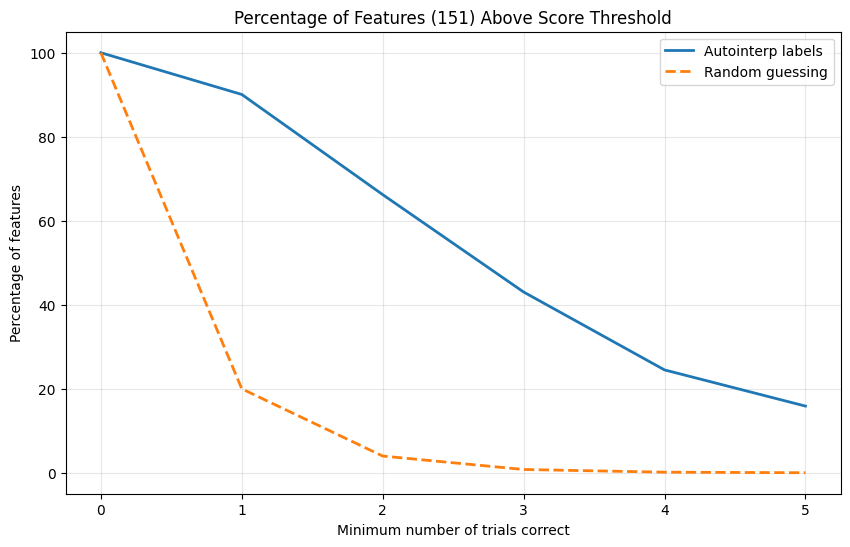

In [20]:
import json
import glob
import matplotlib.pyplot as plt
import numpy as np

# Get all feature files
feature_files = glob.glob("autointerp_features/feature_*.json")

# Extract scores from all features
scores = []
for f in feature_files:
    with open(f) as file:
        data = json.load(file)
        scores.append(data['score'])

# Calculate percentages
scores = np.array(scores)
x_scores = np.sort(np.unique(scores))
y_percentages = []
y_random_guess = []

for score in x_scores:
    # Calculate percentage of features with score >= this value
    pct = 100 * np.mean(scores >= score)
    y_percentages.append(pct)
    
    # Calculate random guessing percentage
    random_pct = 100 * (1/5) ** (score * 5)  # Assuming 5 trials and 1/5 chance of guessing correctly each time
    y_random_guess.append(random_pct)

# Create the plot
plt.figure(figsize=(10,6))
plt.plot(x_scores * 5, y_percentages, '-', linewidth=2, label='Autointerp labels')
plt.plot(x_scores * 5, y_random_guess, '--', linewidth=2, label='Random guessing')
plt.xlabel('Minimum number of trials correct')
plt.ylabel('Percentage of features')
plt.title(f'Percentage of Features ({len(feature_files)}) Above Score Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
